In [1]:
import os
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from desc.twinkles import PostageStampMaker, create_postage_stamps
from desc.twinkles import render_fits_image
%matplotlib inline

plt.ion()
plt.rcParams['figure.figsize'] = (10, 10)

exposure_file = os.path.join(os.environ['TWINKLES_DIR'], 'tests', 'small_CoaddTempExp.fits.gz')

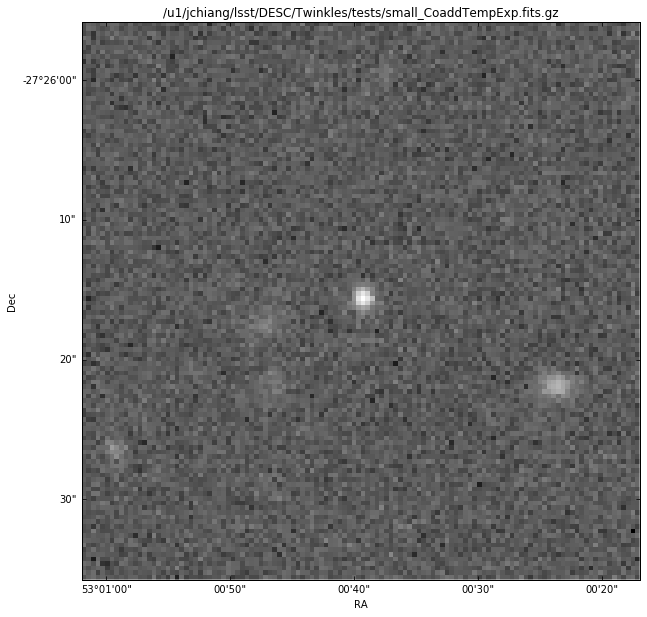

In [2]:
# Display the test image.
image = fits.open(exposure_file)
fig = render_fits_image(image[1], title=exposure_file)

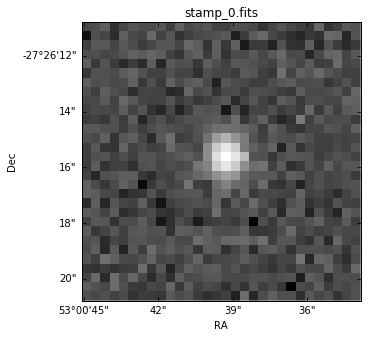

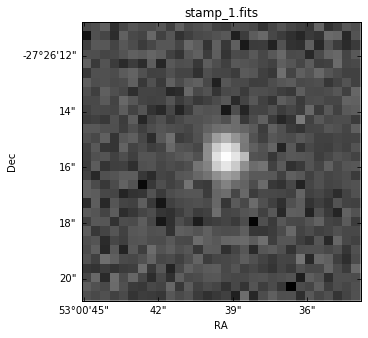

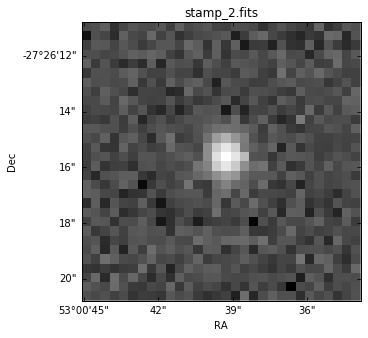

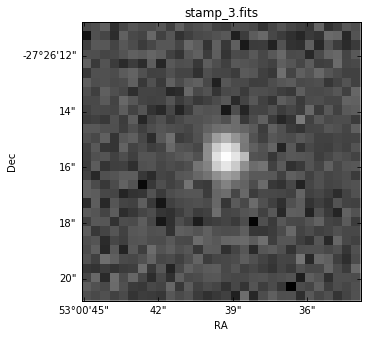

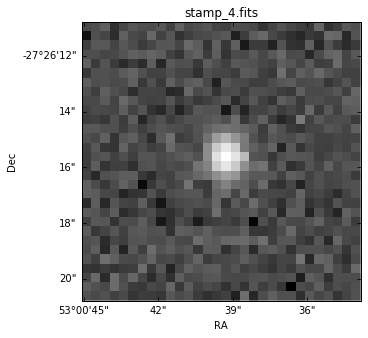

In [3]:
# Create a series of postage stamps from a list of 5 Exposure
# FITS files (using the test image as a proxy for all five) 
# and display each.
plt.rcParams['figure.figsize'] = (5, 5)
expfiles = [exposure_file]*5
ra, dec, size = 53.010895, -27.437648, 10
stamps = create_postage_stamps(ra, dec, size, expfiles)
for i, stamp in enumerate(stamps):
    outfile = 'stamp_%i.fits' % i
    stamp.writeFits(outfile)
    fits_obj = fits.open(outfile)
    render_fits_image(fits_obj[1], title=outfile)